## Symplectic Euler Integrator

In [3]:
def classicInt(z,f1,f2,h):
  ## classical symplectic Euler scheme
    dim = int(len(z)/2)
    q=z[:dim]
    p=z[dim:]
    fstage = lambda stg: h * f1(np.block([q + stg, p]))

    stageold=np.zeros(dim) 
    stage = fstage(stageold) +0.
    # Iter = 0

    # while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<400):
    #   stageold = stage+0.
    #   stage = fstage(stage)+0.
    #   Iter = Iter+1
    q = q+stage
    p = p + h*f2(np.block([q,p]))
    return np.block([q,p])

def classicTrajectory(z,f1,f2,h,N=10,n_h=1):
  ## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = classicInt(trj[:,i].copy(),f1,f2,h_gen)
  return trj[:, :-1], trj[:, 1:]


## Stormer Verlet Integrator

In [2]:
def iterator(fstage,dim,maxiters):
  stageold=np.zeros(dim) 
  stage = fstage(stageold) +0.
  Iter = 0
  while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<maxiters):
    stageold = stage+0.
    stage = fstage(stage)+0.
    Iter = Iter+1
  return stage

def StormerInt(z,f1,f2,h,maxiters):
	## classical symplectic Euler scheme
    dim = int(len(z)/2)
    x=z[:dim]
    y=z[dim:]
    ystage = lambda stg: h/2 * f2(np.block([x, y + stg]))
    stage=iterator(ystage,dim,maxiters)
    y=y+stage

    xstage = lambda stg: h/2 * (f1(np.block([x, y]))+f1(np.block([x+stg, y])))
    stage=iterator(xstage,dim,maxiters)
    x=x+stage
    y=y+h/2*f2(np.block([x, y]))
    return np.block([x,y])

def StormerTrajectory(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = StormerInt(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]



## Fourth order symplectic integrator

In [4]:
def fourth_order(z, f1, f2, h, eps=0.1):
    dim = int(len(z)/2)   
    kq = z[:dim]
    kp = z[dim:]
    c = np.array([0.5/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         0.5/(2.-2.**(1./3.))])
    d = np.array([1./(2.-2.**(1./3.)),
         -2.**(1./3.)/(2.-2.**(1./3.)),
         1./(2.-2.**(1./3.)),0.])
    for i_step in range(int(1)):
        for j in range(4):
            tp = kp
            tq = kq + c[j] * f1(z) * h
            kp = tp + d[j] * f2(z) * h
            kq = tq
    return np.block([kq, kp])


def FourthOrder(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = fourth_order(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]

3-particle toda-lattice [1](https://www.sciencedirect.com/science/article/abs/pii/0167278987900832)

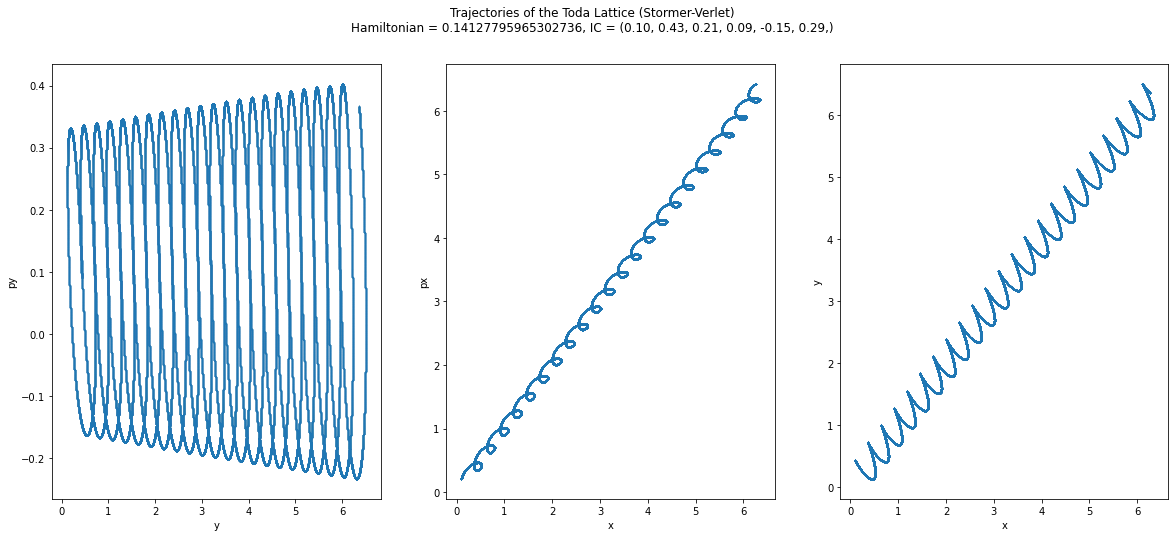

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)
inp = np.random.rand(6)*2.-1.
# fig, ax = plt.subplots(1,3,figsize = (20,8))
# soln = FourthOrder(inp,f1,f2,0.0001,N=800000,n_h=1)
# ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
# ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
# ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
# fig.suptitle("Trajectories of the Kepler System (4-th order symplectic integrator)")
# ax[0].set_xlabel("y")
# ax[0].set_ylabel("py")
# ax[1].set_xlabel("x")
# ax[1].set_ylabel("px")
# ax[2].set_xlabel("x")
# ax[2].set_ylabel("y")
# plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
soln = StormerTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

# fig, ax = plt.subplots(1,3,figsize = (20,8))
# soln = classicTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
# ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
# ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
# ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
# fig.suptitle("Trajectories of the Kepler System (Symplectic Euler)")
# ax[0].set_xlabel("y")
# ax[0].set_ylabel("py")
# ax[1].set_xlabel("x")
# ax[1].set_ylabel("px")
# ax[2].set_xlabel("x")
# ax[2].set_ylabel("y")
# plt.show()

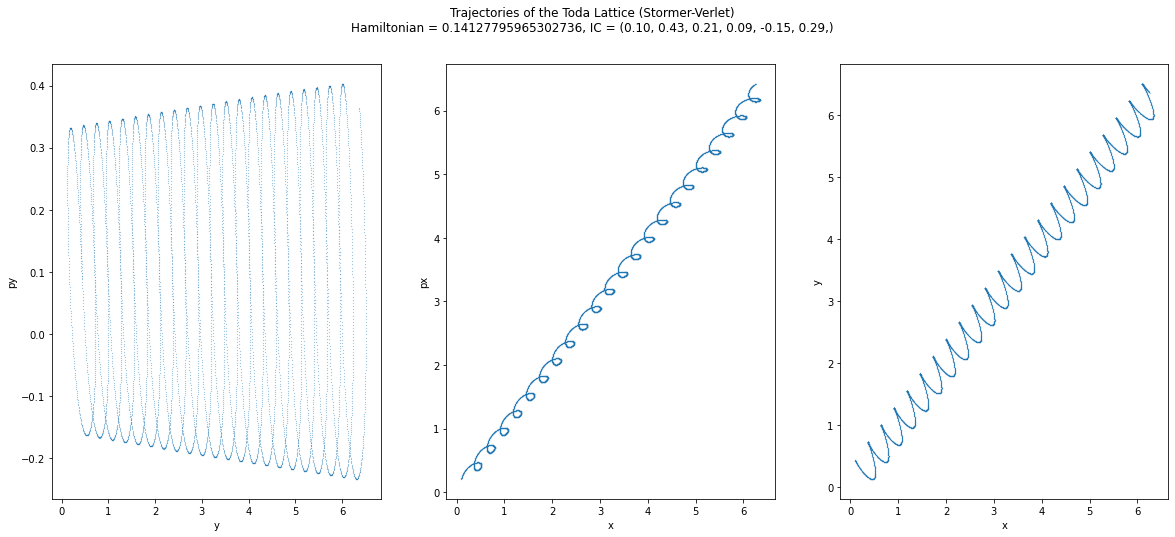

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)
inp = np.random.rand(6)*2.-1.


fig, ax = plt.subplots(1,3,figsize = (20,8))
soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(6)*2.-1.
  fig, ax = plt.subplots(1,6,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x")
  ax[3].set_ylabel("y")
  ax[4].set_xlabel("y")
  ax[4].set_ylabel("z")
  ax[5].set_xlabel("z")
  ax[5].set_ylabel("x")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(6)*2.-1.
  while H(inp)>1/6:
    inp = np.random.rand(6)*2.-1.
  fig, ax = plt.subplots(1,6,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x")
  ax[3].set_ylabel("y")
  ax[4].set_xlabel("y")
  ax[4].set_ylabel("z")
  ax[5].set_xlabel("z")
  ax[5].set_ylabel("x")
  plt.show()



100%|██████████| 50/50 [01:24<00:00,  1.69s/it]


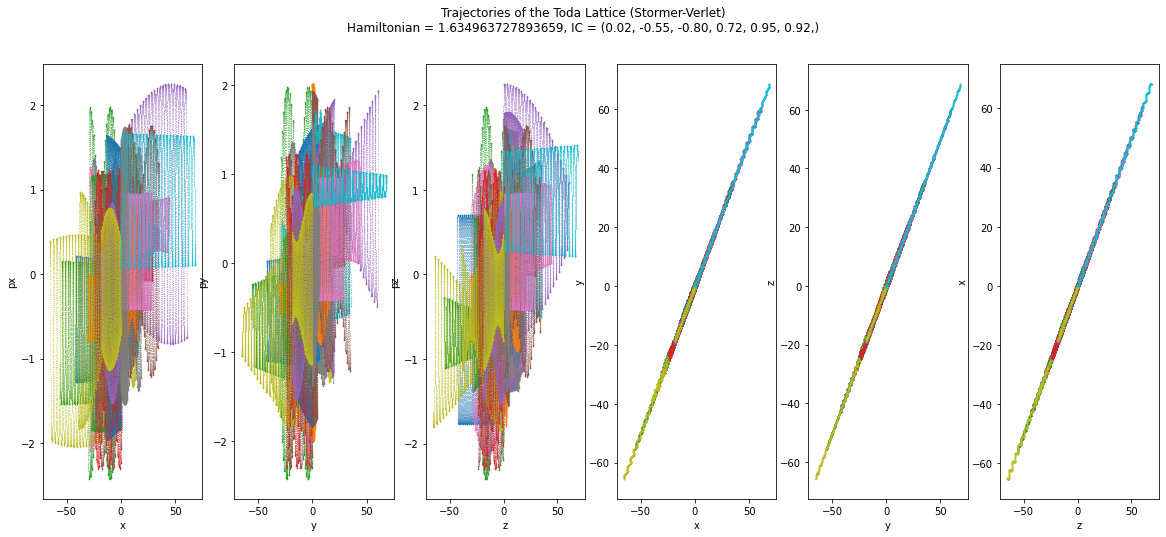

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)

fig, ax = plt.subplots(1,6,figsize = (20,8))

for i in tqdm(range(50)):
  inp = np.random.rand(6)*2.-1.
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  # fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x")
  ax[3].set_ylabel("y")
  ax[4].set_xlabel("y")
  ax[4].set_ylabel("z")
  ax[5].set_xlabel("z")
  ax[5].set_ylabel("x")
plt.show()



  0%|          | 0/10 [00:00<?, ?it/s]

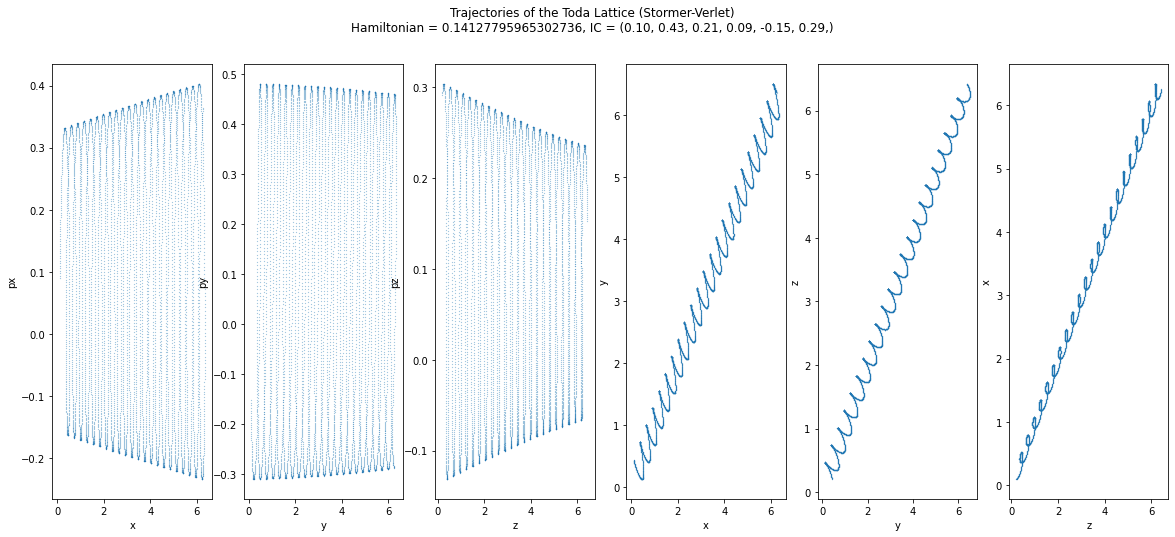

 10%|█         | 1/10 [00:03<00:29,  3.33s/it]

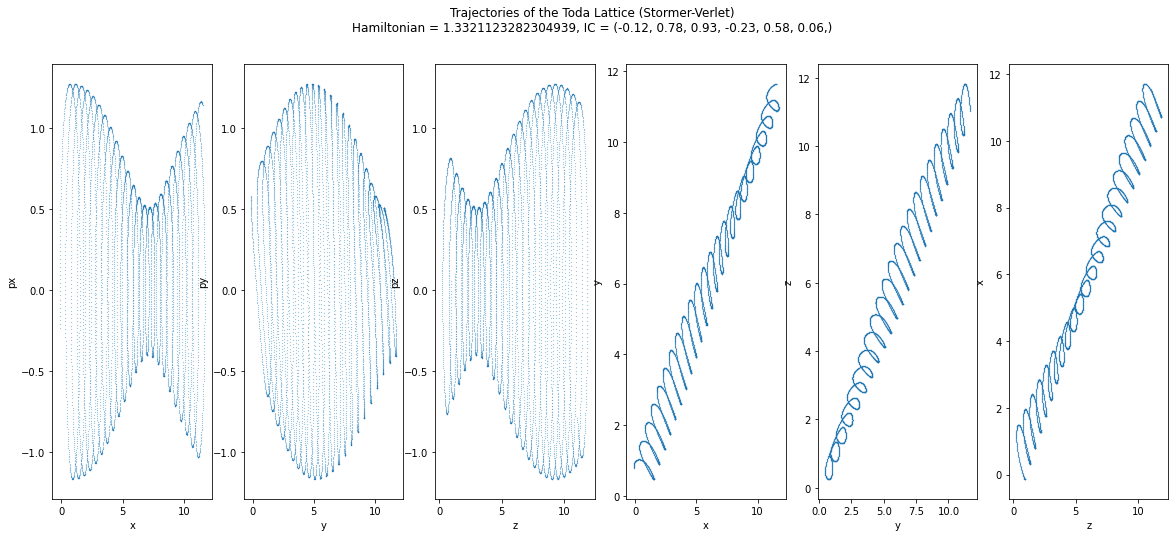

 20%|██        | 2/10 [00:06<00:25,  3.23s/it]

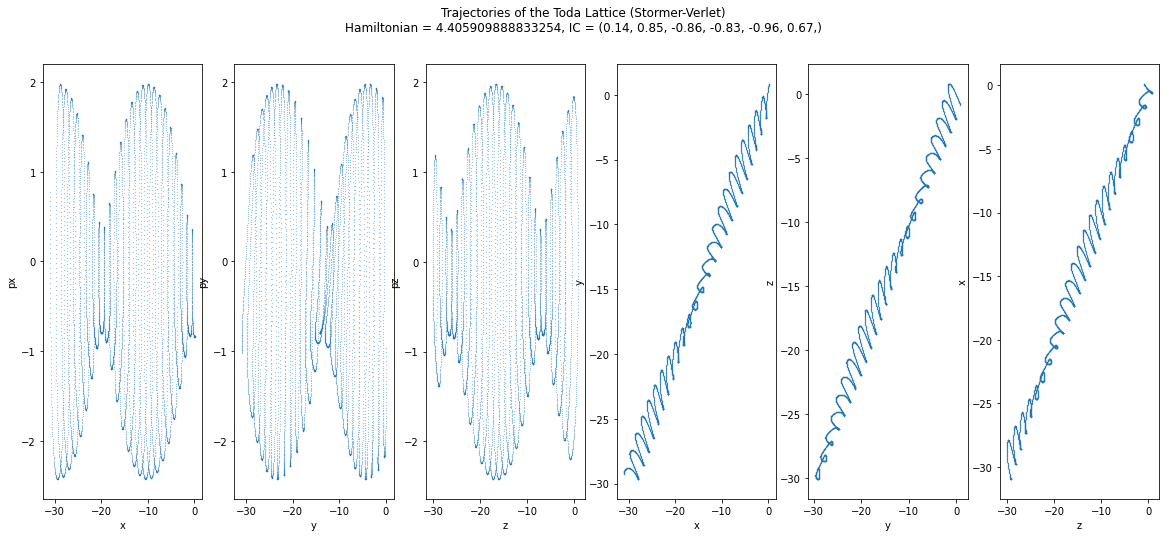

 30%|███       | 3/10 [00:09<00:22,  3.20s/it]

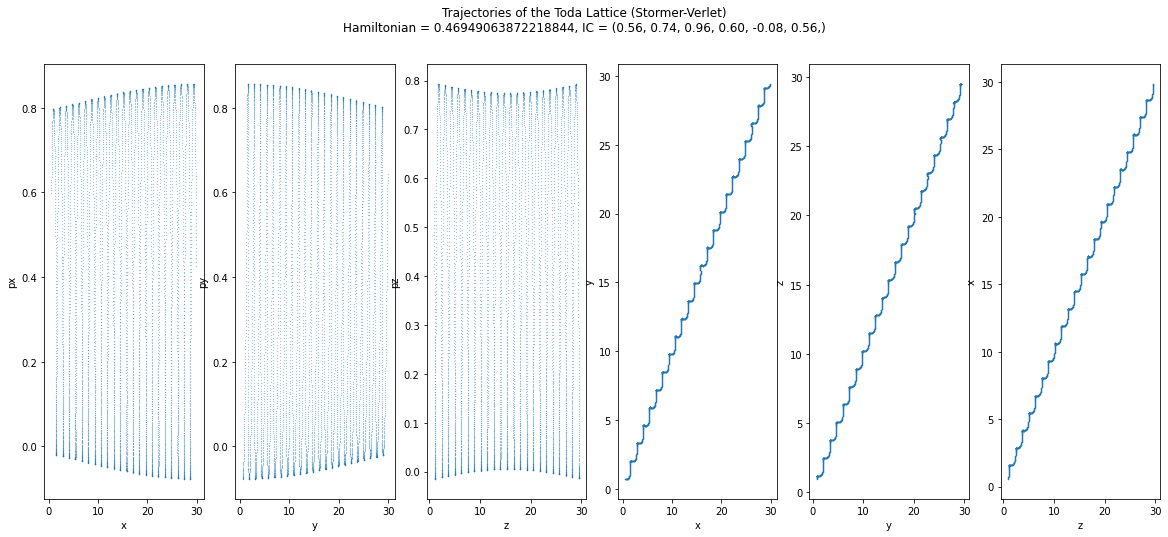

 40%|████      | 4/10 [00:12<00:19,  3.24s/it]

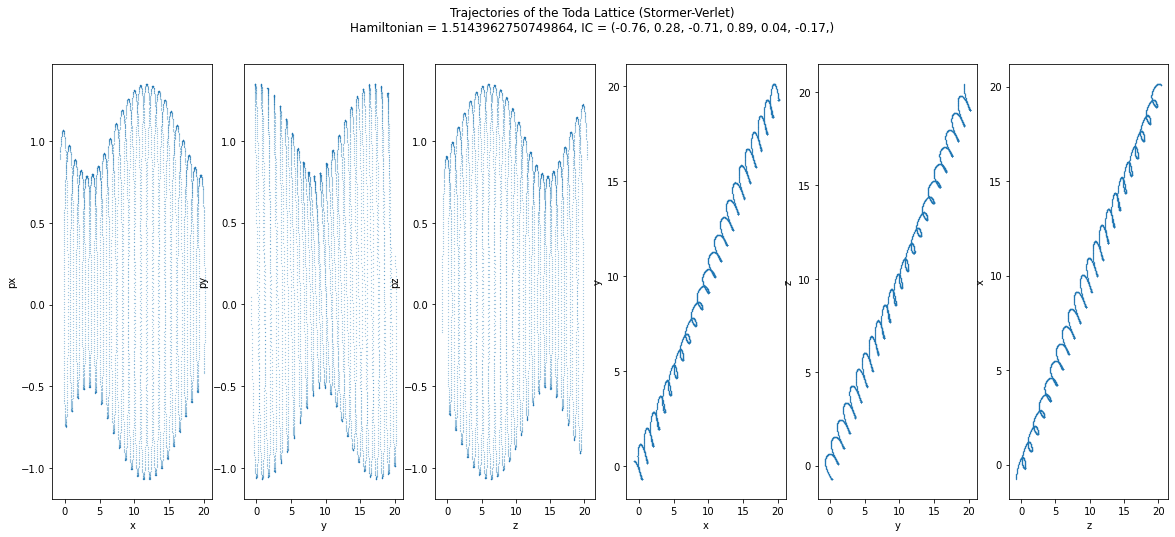

 50%|█████     | 5/10 [00:16<00:16,  3.21s/it]

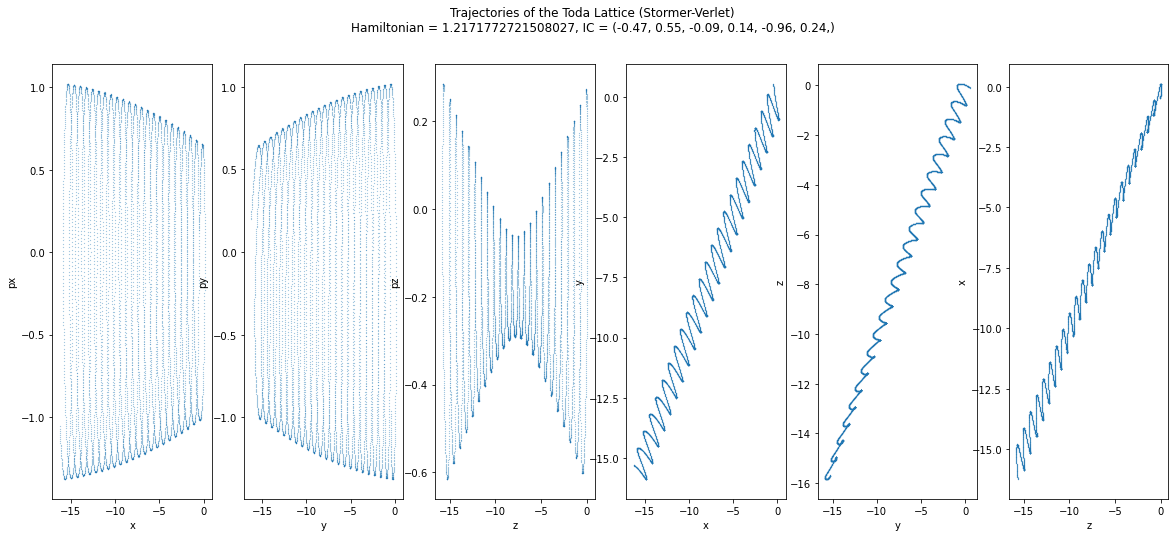

 60%|██████    | 6/10 [00:19<00:12,  3.21s/it]

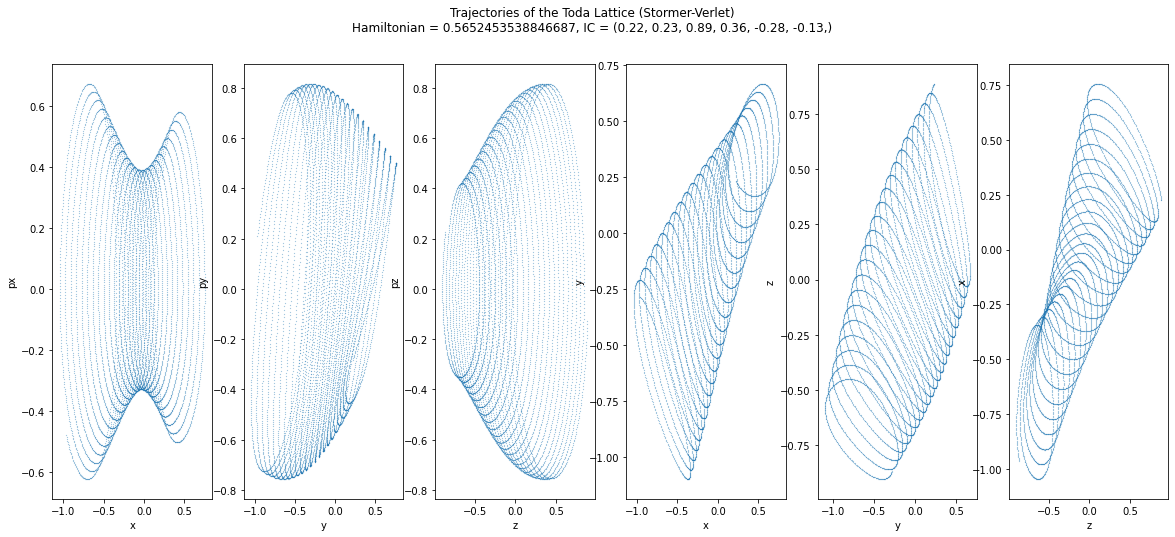

 70%|███████   | 7/10 [00:22<00:09,  3.20s/it]

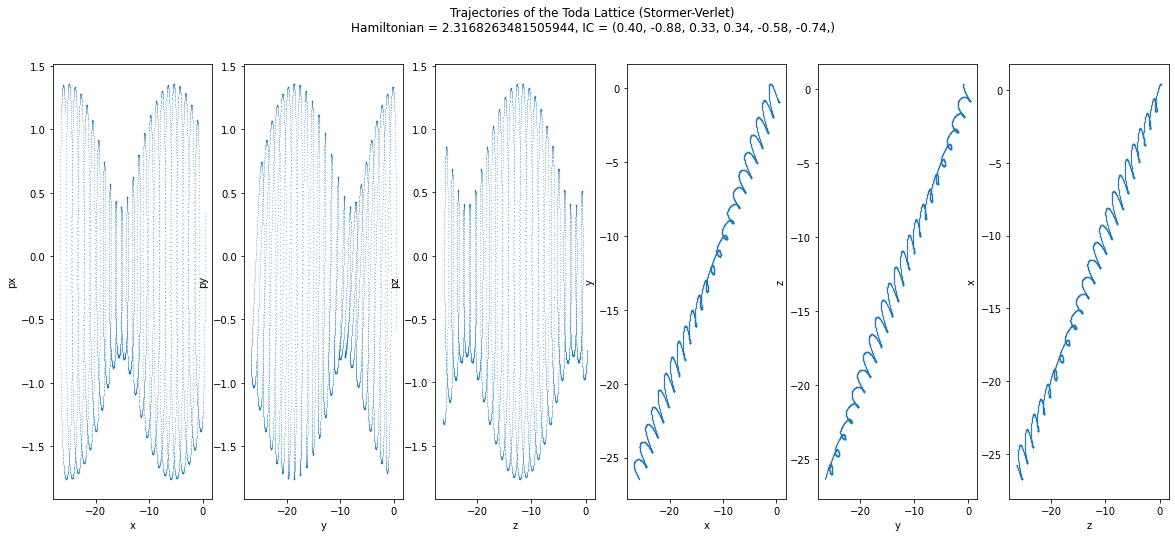

 80%|████████  | 8/10 [00:25<00:06,  3.17s/it]

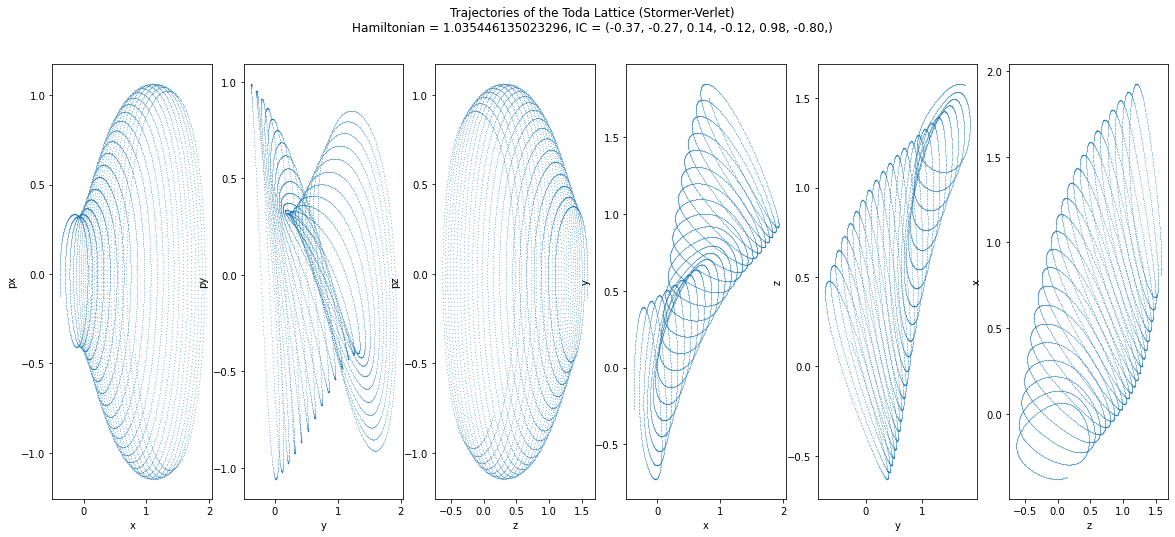

 90%|█████████ | 9/10 [00:30<00:03,  3.64s/it]

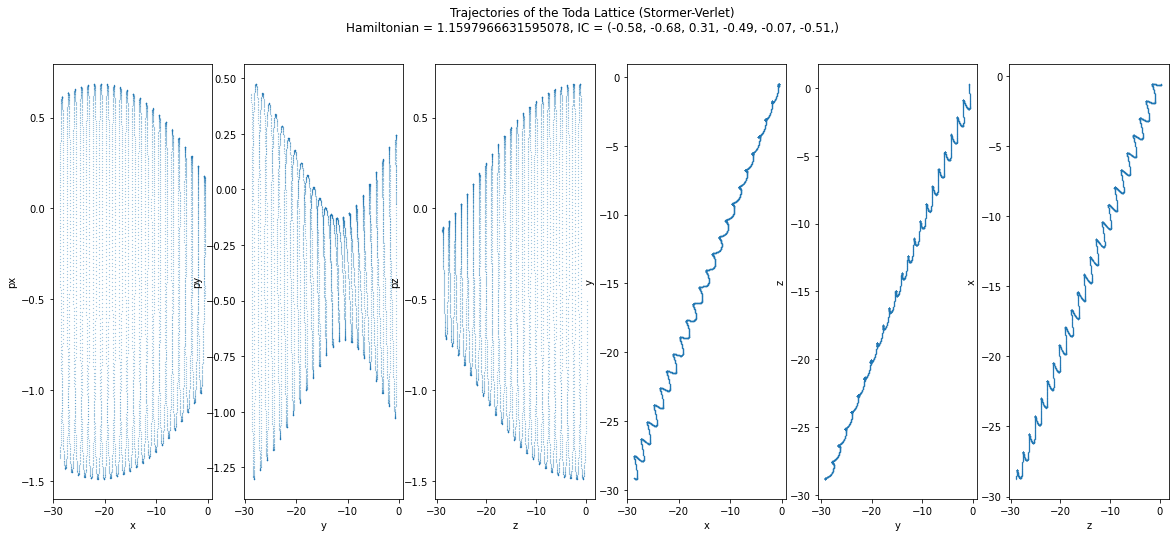

100%|██████████| 10/10 [00:34<00:00,  3.46s/it]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)


for i in tqdm(range(10)):
  fig, ax = plt.subplots(1,6,figsize = (20,8))  
  inp = np.random.rand(6)*2.-1.
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x")
  ax[3].set_ylabel("y")
  ax[4].set_xlabel("y")
  ax[4].set_ylabel("z")
  ax[5].set_xlabel("z")
  ax[5].set_ylabel("x")
  plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(6)-0.5
  while H(inp)>1/6:
    inp = np.random.rand(6)-0.5
  fig, ax = plt.subplots(1,6,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  ax[4].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[5].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][0,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x")
  ax[3].set_ylabel("y")
  ax[4].set_xlabel("y")
  ax[4].set_ylabel("z")
  ax[5].set_xlabel("z")
  ax[5].set_ylabel("x")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(6)-0.5
  # while H(inp)>1/6:
  #   inp = np.random.rand(6)-0.5
  fig, ax = plt.subplots(1,4,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][4,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][2,:], np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  ax[3].scatter(np.asarray(soln)[0][0,:]-np.asarray(soln)[0][1,:], np.asarray(soln)[0][1,:]-np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("px")
  ax[1].set_xlabel("y")
  ax[1].set_ylabel("py")
  ax[2].set_xlabel("z")
  ax[2].set_ylabel("pz")
  ax[3].set_xlabel("x-y")
  ax[3].set_ylabel("y-z")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(6)-0.5
  # while H(inp)>1/6:
  #   inp = np.random.rand(6)-0.5
  fig, ax = plt.subplots(1,2,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][0,:]-np.asarray(soln)[0][1,:], np.asarray(soln)[0][1,:]-np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][3,:]-np.asarray(soln)[0][4,:], np.asarray(soln)[0][4,:]-np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("y-z")
  ax[1].set_xlabel("px-py")
  ax[1].set_ylabel("py-pz")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1.035446 -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

for inp in tqdm(range(50)): # number of trajectories
  fig, ax = plt.subplots(1,3,figsize = (25,8))
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1. -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

for inp in tqdm(range(50)): # number of trajectories
  fig, ax = plt.subplots(1,3,figsize = (25,8))
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
  plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

[-0.43439513  0.35627618 -0.33787974  0.89975076  0.27345554 -0.04359043] 49 458


  2%|▏         | 1/50 [00:17<14:34, 17.84s/it]

[-0.34663112 -0.30040386 -0.06701579  1.32646779 -0.15055971  0.2814796 ] 49 455


  4%|▍         | 2/50 [00:35<13:58, 17.47s/it]

[ 0.25102165  0.42721181 -0.47104745  0.5350073  -0.10743121  0.3783725 ] 49 458


  6%|▌         | 3/50 [00:52<13:32, 17.30s/it]

[ 1.90784776e-01  4.87348757e-01  2.59282452e-01  1.35788424e+00
  1.06317283e-03 -1.23610845e-01] 49 440


  8%|▊         | 4/50 [01:09<13:18, 17.37s/it]

[-0.13508816 -0.2390955  -0.0040297   1.36729827 -0.22265973  0.02437981] 49 456


 10%|█         | 5/50 [01:26<12:59, 17.33s/it]

[-0.38261971 -0.34015471 -0.45319365  1.27695648 -0.49613965 -0.32142003] 49 425


 12%|█▏        | 6/50 [01:44<12:43, 17.36s/it]

[ 0.11286675 -0.4186304   0.3818965   0.9294589   0.46638997  0.00763555] 49 455


 14%|█▍        | 7/50 [02:01<12:25, 17.33s/it]

[-0.19959632  0.04950057  0.43081872  1.05908806 -0.23279297  0.37739879] 49 459


 16%|█▌        | 8/50 [02:18<12:06, 17.29s/it]

[-0.12808125 -0.49861665 -0.25231498  1.28172436  0.35877747 -0.04149683] 49 453


 18%|█▊        | 9/50 [02:35<11:47, 17.25s/it]

[-0.05541271 -0.16389773  0.38067812  1.12258659  0.49189033 -0.12325873] 49 452


 20%|██        | 10/50 [02:56<12:07, 18.20s/it]

[ 0.46614745  0.29187957  0.17568915  1.29810237 -0.28354274 -0.33395218] 49 426


 22%|██▏       | 11/50 [03:13<11:39, 17.93s/it]

[ 0.42275661 -0.20592334 -0.04690575  1.04760018  0.2781716   0.34423496] 49 449


 24%|██▍       | 12/50 [03:31<11:20, 17.90s/it]

[-0.3609273  -0.07309564  0.34285489  0.92837724 -0.39758624 -0.34361665] 49 462


 26%|██▌       | 13/50 [03:48<10:53, 17.67s/it]

[-0.19580131 -0.42464093 -0.075337    1.32303955  0.06821759 -0.25344306] 49 457


 28%|██▊       | 14/50 [04:06<10:34, 17.63s/it]

[ 0.09643307 -0.38247436  0.47588387  0.96048041 -0.10820306 -0.25782141] 49 462


 30%|███       | 15/50 [04:23<10:16, 17.62s/it]

[-0.24960179 -0.01660646 -0.4600072   1.28675695 -0.09169709 -0.12259343] 49 456


 32%|███▏      | 16/50 [04:40<09:55, 17.52s/it]

[0.30936497 0.20903546 0.45433382 1.2965562  0.39754276 0.26996719] 49 448


 34%|███▍      | 17/50 [04:58<09:35, 17.43s/it]

[-0.14257535  0.12166544 -0.21143004  1.25460372 -0.38757268 -0.28756564] 49 440


 36%|███▌      | 18/50 [05:15<09:16, 17.38s/it]

[-0.31696671 -0.096974    0.24523296  1.10267258 -0.01232368 -0.49945404] 49 457


 38%|███▊      | 19/50 [05:32<08:56, 17.30s/it]

[-0.07459827 -0.43644623 -0.29174675  1.25636351 -0.2846018   0.35833764] 49 414


 40%|████      | 20/50 [05:49<08:37, 17.26s/it]

[ 0.30289337 -0.34085376  0.10571196  1.09555611  0.22788816  0.13746228] 49 455


 42%|████▏     | 21/50 [06:07<08:21, 17.31s/it]

[ 0.31193856 -0.02061545  0.41486309  1.26928377 -0.20711143  0.2150526 ] 49 455


 44%|████▍     | 22/50 [06:25<08:09, 17.50s/it]

[-0.08189079 -0.32704865 -0.39278925  1.30231179 -0.02685702  0.38228367] 49 432


 46%|████▌     | 23/50 [06:41<07:46, 17.28s/it]

[ 0.23328913 -0.09027379 -0.12648899  1.24852905  0.38905995  0.23727858] 49 447


 48%|████▊     | 24/50 [06:58<07:24, 17.08s/it]

[-0.49484704  0.19415785  0.41950741  0.55176987 -0.32299422 -0.01648187] 49 460


 50%|█████     | 25/50 [07:15<07:03, 16.95s/it]

[-0.35968398 -0.14100472  0.43711704  0.87246517 -0.21716315 -0.16036896] 49 461


 52%|█████▏    | 26/50 [07:31<06:44, 16.84s/it]

[ 0.10021287  0.4631973  -0.35219867  0.82272082  0.37355683 -0.00810777] 49 458


 54%|█████▍    | 27/50 [07:48<06:26, 16.80s/it]

[ 0.39896109 -0.3144821   0.03266859  1.03995682 -0.18345744 -0.05312304] 49 458


 56%|█████▌    | 28/50 [08:05<06:10, 16.83s/it]

[-0.06692255 -0.14265312  0.41497077  1.16761819  0.22754699 -0.21008655] 49 456


 58%|█████▊    | 29/50 [08:21<05:51, 16.74s/it]

[0.07770942 0.27917943 0.29559037 1.33476657 0.27087276 0.2358939 ] 49 449


 60%|██████    | 30/50 [08:38<05:32, 16.64s/it]

[-0.35849351  0.36594547 -0.05867853  1.12529529 -0.05163082  0.067846  ] 49 454


 62%|██████▏   | 31/50 [08:54<05:15, 16.61s/it]

[ 0.12116925 -0.00182043  0.36678854  1.33468369 -0.09857205 -0.08330824] 49 458


 64%|██████▍   | 32/50 [09:11<05:00, 16.68s/it]

[ 0.31083862 -0.15180806 -0.2885452   1.05618429  0.37602685  0.41854645] 49 446


 66%|██████▌   | 33/50 [09:28<04:44, 16.76s/it]

[-0.37987982 -0.16552626 -0.32462793  1.25343328  0.39986674 -0.44312274] 49 454


 68%|██████▊   | 34/50 [09:45<04:27, 16.69s/it]

[ 0.48048566 -0.40354914  0.36347065  0.63911727 -0.13208251 -0.15765762] 49 460


 70%|███████   | 35/50 [10:01<04:09, 16.64s/it]

[ 0.25736414 -0.1854267   0.15731892  1.22291418 -0.01503435  0.40116217] 49 451


 72%|███████▏  | 36/50 [10:18<03:52, 16.57s/it]

[ 0.05464506  0.3268616   0.22557353  1.31752317  0.27311005 -0.28312975] 49 439


 74%|███████▍  | 37/50 [10:34<03:34, 16.53s/it]

[ 0.40314965 -0.45707581 -0.16692797  0.73643307 -0.02441088  0.32002244] 49 451


 76%|███████▌  | 38/50 [10:50<03:18, 16.52s/it]

[-0.20181264 -0.3490651  -0.16973296  1.31992278 -0.35961604 -0.27263755] 49 458


 78%|███████▊  | 39/50 [11:07<03:02, 16.55s/it]

[-0.43114804  0.20571004 -0.10476676  1.16934065  0.21862639 -0.16402246] 49 454


 80%|████████  | 40/50 [11:24<02:46, 16.61s/it]

[ 0.22777127  0.3151994  -0.28233716  1.08330451 -0.33764205 -0.20915909] 49 461


 82%|████████▏ | 41/50 [11:41<02:29, 16.62s/it]

[-0.32020471 -0.15449434 -0.01993911  1.25700674  0.35360604  0.38944791] 49 448


 84%|████████▍ | 42/50 [11:57<02:12, 16.61s/it]

[-0.27989614  0.12289403 -0.38850394  1.21179696 -0.17766646 -0.18349925] 49 458


 86%|████████▌ | 43/50 [12:14<01:56, 16.68s/it]

[-0.01741576  0.22982764 -0.43081734  1.04088143  0.23481377 -0.32350061] 49 460


 88%|████████▊ | 44/50 [12:31<01:40, 16.78s/it]

[ 0.43916091  0.00631222  0.49980858  1.23510095  0.0349082  -0.20975196] 49 459


 90%|█████████ | 45/50 [12:47<01:23, 16.71s/it]

[-0.19582644  0.09106538  0.42171907  1.13996191  0.2239414   0.05917378] 49 453


 92%|█████████▏| 46/50 [13:04<01:06, 16.69s/it]

[ 0.4222985  -0.00763859  0.37383218  1.22439101 -0.28616465  0.27122546] 49 454


 94%|█████████▍| 47/50 [13:21<00:50, 16.69s/it]

[-0.48782884 -0.17717046 -0.27043256  1.27864614  0.23685316 -0.40232363] 49 437


 96%|█████████▌| 48/50 [13:37<00:33, 16.61s/it]

[ 0.0149222   0.43841202 -0.27135345  0.9341736   0.09288027 -0.4899363 ] 49 463


 98%|█████████▊| 49/50 [13:54<00:16, 16.60s/it]

[-0.0241738   0.20877039 -0.45602457  1.00405471  0.02008142 -0.46933895] 49 462


100%|██████████| 50/50 [14:10<00:00, 17.02s/it]


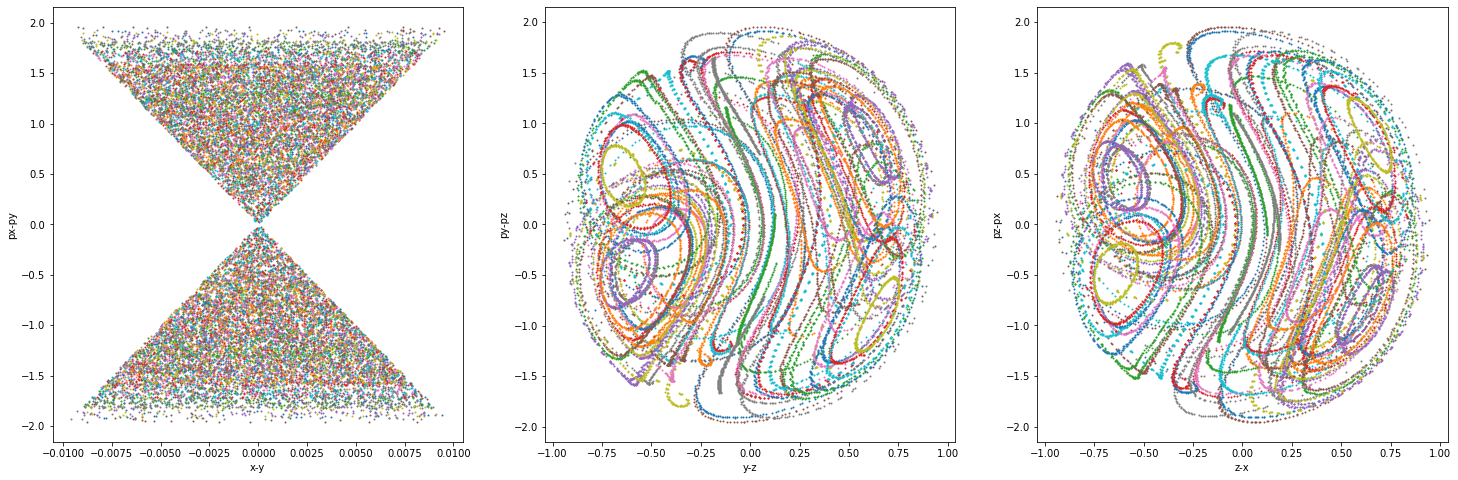

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1. -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,3,figsize = (25,8))

for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints, s=1.)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints, s=1.)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints, s=1.)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
plt.show()

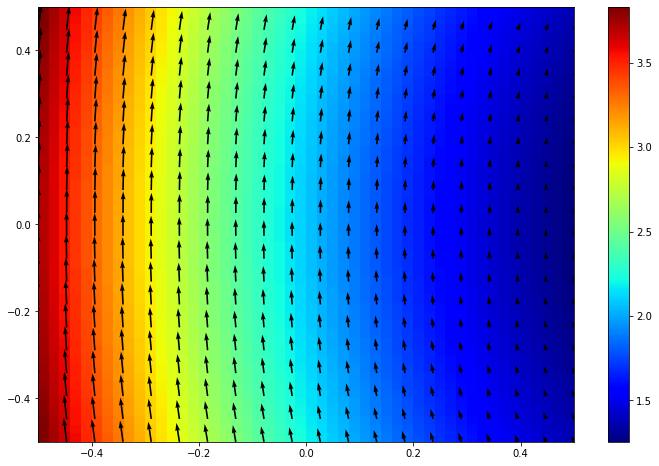

In [23]:
from matplotlib import cm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1. -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

spacedim=[(-0.5,0.5), (-0.5,0.5),(-0.5,0.5), (-0.5,0.5)]
fvector = lambda x: np.asarray([f1(x), f2(x)])
h= 0.1

"""# Test dataset creation"""


xxshort1,yyshort1 = np.linspace(spacedim[0][0], spacedim[0][1], 50), np.linspace(spacedim[1][0], spacedim[1][1], 50)
xshort1,yshort1 = np.meshgrid(xxshort1,yyshort1)
xxshort2,yyshort2 = np.linspace(spacedim[0][0], spacedim[0][1], 20), np.linspace(spacedim[1][0], spacedim[1][1], 20)
xshort2,yshort2 = np.meshgrid(xxshort2,yyshort2)

sample_points = np.hstack((np.c_[np.ravel(xshort2),np.ravel(yshort2)], np.ones((20**2,4))))[:, [0,2,3,1,4,5]].transpose() #np.expand_dims(np.c_[np.ravel(xshort2),np.ravel(yshort2)],2)

plt.figure(figsize = (12,8))
plt.quiver(xshort2,yshort2,f1(sample_points)[0,:].reshape(xshort2.shape),f2(sample_points)[0,:].reshape(xshort2.shape)) #x,y,dH/dy,-dH/dx
plt.imshow(np.flip(H(np.hstack((np.c_[np.ravel(xshort1),np.ravel(yshort1)], np.ones((50**2,4))))[:, [0,2,3,1,4,5]].transpose()).reshape(xshort1.shape),0), cmap = cm.jet, extent = (spacedim[0][0], spacedim[0][1], spacedim[1][0], spacedim[1][1]), aspect = 'auto')
plt.colorbar()


  0%|          | 0/50 [00:00<?, ?it/s]

[0.32190391 0.         0.3830776  1.22741281 0.         0.49423308] 49 450


  2%|▏         | 1/50 [00:16<13:24, 16.41s/it]

[ 0.11476989  0.         -0.48574848  1.12910498  0.          0.36613471] 49 454


  4%|▍         | 2/50 [00:32<13:07, 16.40s/it]

[ 0.46081253  0.         -0.45542889  0.93390348  0.          0.0579874 ] 49 454


  6%|▌         | 3/50 [00:49<12:57, 16.53s/it]

[0.48244488 0.         0.1658714  1.26790296 0.         0.02771473] 49 454


  8%|▊         | 4/50 [01:06<12:40, 16.54s/it]

[-0.26247686  0.         -0.24194079  1.29264261  0.          0.4492799 ] 49 450


 10%|█         | 5/50 [01:22<12:29, 16.65s/it]

[ 0.19408738  0.         -0.33107388  1.25260224  0.          0.18638023] 49 452


 12%|█▏        | 6/50 [01:39<12:10, 16.60s/it]

[-0.20410802  0.         -0.14411085  1.32482855  0.         -0.42472272] 49 452


 14%|█▍        | 7/50 [01:55<11:51, 16.54s/it]

[-0.4217539   0.          0.26659105  1.05071322  0.          0.26721007] 49 456


 16%|█▌        | 8/50 [02:12<11:33, 16.51s/it]

[-0.21284729  0.          0.04335264  1.35461548  0.         -0.22201006] 49 450


 18%|█▊        | 9/50 [02:28<11:17, 16.52s/it]

[ 0.29328167  0.          0.08023787  1.28127643  0.         -0.46330858] 49 457


 20%|██        | 10/50 [02:45<11:00, 16.52s/it]

[-0.3525999   0.         -0.41620865  1.27835533  0.         -0.2257043 ] 49 456


 22%|██▏       | 11/50 [03:01<10:45, 16.56s/it]

[0.20184048 0.         0.37331943 1.34167123 0.         0.04004796] 49 456


 24%|██▍       | 12/50 [03:18<10:28, 16.53s/it]

[ 0.14554429  0.         -0.39889251  1.24210603  0.          0.05613318] 49 453


 26%|██▌       | 13/50 [03:34<10:11, 16.53s/it]

[-0.18197137  0.          0.46573428  1.00970652  0.          0.48537856] 49 456


 28%|██▊       | 14/50 [03:51<09:56, 16.56s/it]

[ 0.38728315  0.         -0.18640939  1.2317365   0.         -0.01285187] 49 450


 30%|███       | 15/50 [04:08<09:40, 16.58s/it]

[ 0.49036852  0.         -0.38165057  0.98344764  0.          0.03717013] 49 445


 32%|███▏      | 16/50 [04:25<09:28, 16.72s/it]

[-0.29981011  0.          0.14422318  1.21457687  0.         -0.43992204] 49 440


 34%|███▍      | 17/50 [04:41<09:09, 16.65s/it]

[-0.29013953  0.         -0.30676371  1.28844706  0.         -0.39814538] 49 455


 36%|███▌      | 18/50 [04:58<08:50, 16.58s/it]

[-0.36582636  0.         -0.20124969  1.24943137  0.          0.49802279] 49 447


 38%|███▊      | 19/50 [05:14<08:34, 16.61s/it]

[ 0.03397792  0.         -0.10338989  1.3885842   0.         -0.20387223] 49 431


 40%|████      | 20/50 [05:31<08:15, 16.53s/it]

[-0.00659304  0.         -0.03894978  1.39878124  0.          0.2019776 ] 49 436


 42%|████▏     | 21/50 [05:47<07:59, 16.55s/it]

[-0.01031509  0.         -0.10298633  1.35046657  0.         -0.39601192] 49 429


 44%|████▍     | 22/50 [06:04<07:42, 16.53s/it]

[ 0.40789846  0.          0.11527643  1.31056078  0.         -0.016541  ] 49 454


 46%|████▌     | 23/50 [06:20<07:26, 16.52s/it]

[ 0.38118825  0.         -0.2284489   1.21248464  0.          0.03794578] 49 431


 48%|████▊     | 24/50 [06:37<07:08, 16.48s/it]

[0.43766309 0.         0.48343398 1.21411046 0.         0.31745326] 49 453


 50%|█████     | 25/50 [06:53<06:53, 16.53s/it]

[ 0.26904699  0.         -0.18016611  1.26247509  0.          0.3429733 ] 49 450


 52%|█████▏    | 26/50 [07:10<06:36, 16.50s/it]

[-0.48374721  0.         -0.05712698  1.2588382   0.         -0.02581519] 49 431


 54%|█████▍    | 27/50 [07:26<06:18, 16.45s/it]

[ 0.0147671   0.          0.2128923   1.36821476  0.         -0.20861118] 49 456


 56%|█████▌    | 28/50 [07:43<06:05, 16.60s/it]

[-0.46195532  0.          0.16716882  1.09754569  0.          0.30206852] 49 455


 58%|█████▊    | 29/50 [08:00<05:49, 16.63s/it]

[-0.12558602  0.         -0.12173218  1.34503547  0.          0.40036745] 49 448


 60%|██████    | 30/50 [08:16<05:32, 16.60s/it]

[ 0.48327487  0.         -0.30637671  1.02865455  0.         -0.27225901] 49 452


 62%|██████▏   | 31/50 [08:33<05:15, 16.60s/it]

[-0.05320668  0.         -0.27817597  1.35541601  0.          0.16721471] 49 452


 64%|██████▍   | 32/50 [08:49<04:58, 16.57s/it]

[ 0.29807902  0.          0.48046646  1.25582696  0.         -0.3020172 ] 49 459


 66%|██████▌   | 33/50 [09:06<04:42, 16.64s/it]

[-0.09522637  0.          0.27193087  1.29868311  0.          0.2898695 ] 49 454


 68%|██████▊   | 34/50 [09:23<04:26, 16.65s/it]

[-0.1827398   0.          0.1496565   1.32854817  0.          0.24160311] 49 453


 70%|███████   | 35/50 [09:39<04:09, 16.63s/it]

[ 0.27054406  0.         -0.34965024  1.13435413  0.          0.42315902] 49 453


 72%|███████▏  | 36/50 [09:56<03:51, 16.57s/it]

[-0.39490531  0.          0.37545132  0.9540171   0.          0.2175595 ] 49 457


 74%|███████▍  | 37/50 [10:12<03:35, 16.55s/it]

[0.23815155 0.         0.29986544 1.34622724 0.         0.20178576] 49 453


 76%|███████▌  | 38/50 [10:29<03:18, 16.56s/it]

[-0.36156316  0.         -0.01895755  1.3205605   0.          0.08627732] 49 452


 78%|███████▊  | 39/50 [10:46<03:02, 16.56s/it]

[-0.1513348   0.          0.30487845  1.28178116  0.         -0.08554347] 49 457


 80%|████████  | 40/50 [11:03<02:47, 16.72s/it]

[-0.37250112  0.         -0.44024208  1.1977083   0.          0.46076647] 49 452


 82%|████████▏ | 41/50 [11:19<02:29, 16.64s/it]

[ 0.14056459  0.         -0.45754551  1.1884883   0.         -0.15989925] 49 455


 84%|████████▍ | 42/50 [11:36<02:12, 16.61s/it]

[-0.43140317  0.         -0.14201606  1.29419491  0.          0.22239152] 49 422


 86%|████████▌ | 43/50 [11:52<01:56, 16.59s/it]

[-0.18236813  0.         -0.48030836  1.24814112  0.          0.240245  ] 49 455


 88%|████████▊ | 44/50 [12:09<01:39, 16.55s/it]

[0.12831383 0.         0.26891944 1.29088271 0.         0.47901092] 49 450


 90%|█████████ | 45/50 [12:25<01:23, 16.61s/it]

[ 0.39882522  0.          0.08815767  1.25974974  0.         -0.368424  ] 49 457


 92%|█████████▏| 46/50 [12:42<01:06, 16.62s/it]

[ 0.2403472   0.         -0.12694547  1.31866971  0.          0.24860601] 49 429


 94%|█████████▍| 47/50 [12:59<00:49, 16.60s/it]

[-0.04734647  0.          0.41540765  1.26001928  0.         -0.08837354] 49 458


 96%|█████████▌| 48/50 [13:15<00:33, 16.56s/it]

[-0.19473299  0.          0.49065169  1.00275645  0.         -0.39350469] 49 458


 98%|█████████▊| 49/50 [13:31<00:16, 16.52s/it]

[ 0.150914    0.          0.18449855  1.38975964  0.         -0.10687758] 49 455


100%|██████████| 50/50 [13:48<00:00, 16.57s/it]


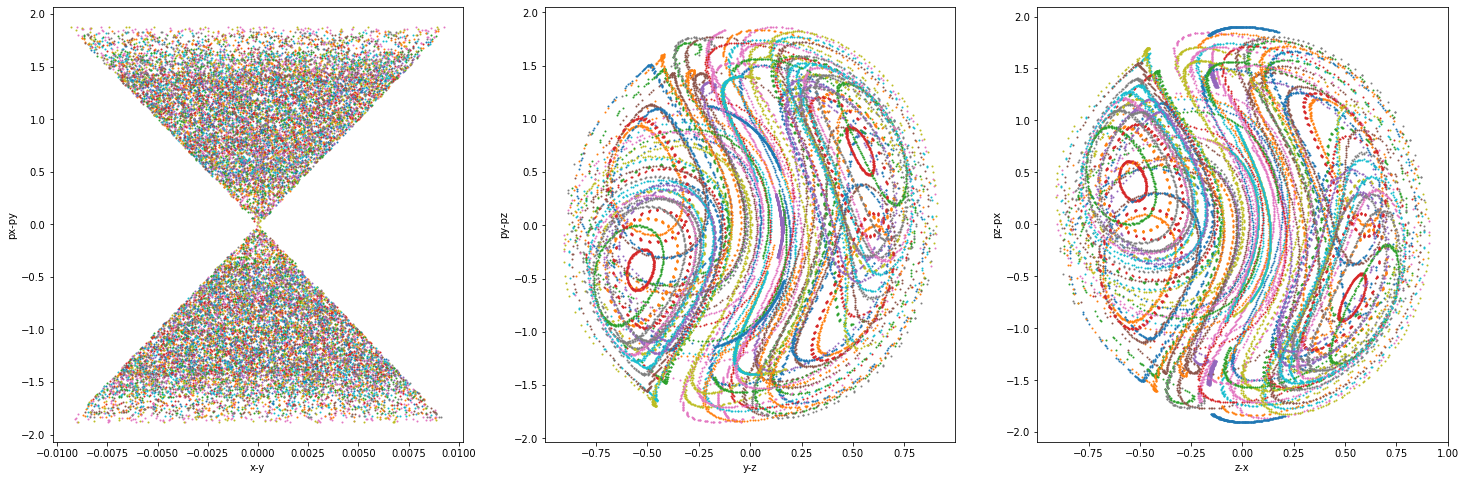

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1. -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,3,figsize = (25,8))

for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  inp[1], inp[4] = 0,0 
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
    inp[1], inp[4] = 0,0 # setting some dimensions to 0 
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints, s=1.)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints, s=1.)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints, s=1.)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(6)-0.5
  # while H(inp)>1/6:
  #   inp = np.random.rand(6)-0.5
  fig, ax = plt.subplots(1,1,figsize = (12,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  ax.scatter(np.asarray(soln)[0][0,:]-np.asarray(soln)[0][1,:], np.asarray(soln)[0][1,:]-np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  # ax[1].scatter(np.asarray(soln)[0][3,:]-np.asarray(soln)[0][4,:], np.asarray(soln)[0][4,:]-np.asarray(soln)[0][5,:], marker = '.', s=0.1)
  print("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], inp[4], inp[5]))
  # ax[0].set_xlabel("x-y")
  # ax[0].set_ylabel("y-z")
  # ax[1].set_xlabel("px-py")
  # ax[1].set_ylabel("py-pz")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

  2%|▏         | 1/50 [00:17<14:20, 17.57s/it]

[-0.06241279  0.5         0.5         0.92224279  0.5         0.5       ] 0 425


  4%|▍         | 2/50 [00:34<13:55, 17.42s/it]

[0.06804456 0.5        0.5        1.05876836 0.5        0.5       ] 0 432


  6%|▌         | 3/50 [00:52<13:36, 17.38s/it]

[0.27815675 0.5        0.5        1.18370892 0.5        0.5       ] 0 441


  8%|▊         | 4/50 [01:09<13:25, 17.51s/it]

[-0.23544439  0.5         0.5         0.60712209  0.5         0.5       ] 0 448


 10%|█         | 5/50 [01:27<13:06, 17.47s/it]

[0.11209572 0.5        0.5        1.09328315 0.5        0.5       ] 0 434


 12%|█▏        | 6/50 [01:44<12:45, 17.39s/it]

[0.1976312  0.5        0.5        1.14706095 0.5        0.5       ] 0 437


 14%|█▍        | 7/50 [02:01<12:24, 17.31s/it]

[-0.18457165  0.5         0.5         0.72494349  0.5         0.5       ] 0 406


 16%|█▌        | 8/50 [02:18<12:05, 17.27s/it]

[-0.29112324  0.5         0.5         0.42612657  0.5         0.5       ] 0 449


 18%|█▊        | 9/50 [02:35<11:44, 17.18s/it]

[0.32099323 0.5        0.5        1.19822445 0.5        0.5       ] 0 443


 20%|██        | 10/50 [02:53<11:28, 17.22s/it]

[0.47676109 0.5        0.5        1.22430383 0.5        0.5       ] 0 445


 22%|██▏       | 11/50 [03:10<11:09, 17.16s/it]

[-0.2038598   0.5         0.5         0.68379428  0.5         0.5       ] 0 397


 24%|██▍       | 12/50 [03:27<10:52, 17.18s/it]

[0.06660145 0.5        0.5        1.05755103 0.5        0.5       ] 0 432


 26%|██▌       | 13/50 [03:44<10:35, 17.18s/it]

[-0.18143105  0.5         0.5         0.73130433  0.5         0.5       ] 0 406


 28%|██▊       | 14/50 [04:04<10:48, 18.01s/it]

[0.08651293 0.5        0.5        1.07385156 0.5        0.5       ] 0 432


 30%|███       | 15/50 [04:21<10:21, 17.74s/it]

[0.23519402 0.5        0.5        1.16573331 0.5        0.5       ] 0 441


 32%|███▏      | 16/50 [04:38<09:56, 17.54s/it]

[-0.27691837  0.5         0.5         0.48045615  0.5         0.5       ] 0 449


 34%|███▍      | 17/50 [04:56<09:38, 17.53s/it]

[0.31379782 0.5        0.5        1.1960171  0.5        0.5       ] 0 443


 36%|███▌      | 18/50 [05:13<09:17, 17.42s/it]

[0.22525428 0.5        0.5        1.1610674  0.5        0.5       ] 0 439


 38%|███▊      | 19/50 [05:30<08:57, 17.34s/it]

[0.15210327 0.5        0.5        1.120484   0.5        0.5       ] 0 435


 40%|████      | 20/50 [05:47<08:36, 17.21s/it]

[0.30619399 0.5        0.5        1.19358411 0.5        0.5       ] 0 443


 42%|████▏     | 21/50 [06:03<08:13, 17.00s/it]

[0.30731896 0.5        0.5        1.1939506  0.5        0.5       ] 0 443


 44%|████▍     | 22/50 [06:20<07:52, 16.86s/it]

[0.2220556  0.5        0.5        1.15952429 0.5        0.5       ] 0 439


 46%|████▌     | 23/50 [06:37<07:32, 16.75s/it]

[0.22999056 0.5        0.5        1.163315   0.5        0.5       ] 0 439


 48%|████▊     | 24/50 [06:53<07:13, 16.67s/it]

[0.2936977  0.5        0.5        1.18935966 0.5        0.5       ] 0 443


 50%|█████     | 25/50 [07:09<06:55, 16.60s/it]

[-0.33530584  0.5         0.5         0.14655461  0.5         0.5       ] 0 430


 52%|█████▏    | 26/50 [07:26<06:39, 16.64s/it]

[0.0356328  0.5        0.5        1.03000991 0.5        0.5       ] 0 430


 54%|█████▍    | 27/50 [07:43<06:20, 16.56s/it]

[-0.31380699  0.5         0.5         0.31733332  0.5         0.5       ] 0 450


 56%|█████▌    | 28/50 [07:59<06:04, 16.55s/it]

[0.49033895 0.5        0.5        1.22466866 0.5        0.5       ] 0 445


 58%|█████▊    | 29/50 [08:16<05:50, 16.68s/it]

[-0.17998285  0.5         0.5         0.73420765  0.5         0.5       ] 0 406


 60%|██████    | 30/50 [08:32<05:32, 16.61s/it]

[-0.22645797  0.5         0.5         0.63029746  0.5         0.5       ] 0 448


 62%|██████▏   | 31/50 [08:49<05:15, 16.61s/it]

[0.44737059 0.5        0.5        1.22248068 0.5        0.5       ] 0 445


 64%|██████▍   | 32/50 [09:06<04:59, 16.63s/it]

[-0.29252992  0.5         0.5         0.42029522  0.5         0.5       ] 0 449


 66%|██████▌   | 33/50 [09:22<04:42, 16.60s/it]

[0.36385561 0.5        0.5        1.2094925  0.5        0.5       ] 0 445


 68%|██████▊   | 34/50 [09:39<04:24, 16.55s/it]

[0.06542131 0.5        0.5        1.05655127 0.5        0.5       ] 0 432


 70%|███████   | 35/50 [09:55<04:08, 16.58s/it]

[0.26532525 0.5        0.5        1.17870654 0.5        0.5       ] 0 441


 72%|███████▏  | 36/50 [10:12<03:52, 16.59s/it]

[0.46193638 0.5        0.5        1.22356118 0.5        0.5       ] 0 445


 74%|███████▍  | 37/50 [10:28<03:34, 16.52s/it]

[0.16991655 0.5        0.5        1.13141685 0.5        0.5       ] 0 437


 76%|███████▌  | 38/50 [10:45<03:18, 16.52s/it]

[0.47749514 0.5        0.5        1.22433125 0.5        0.5       ] 0 445


 78%|███████▊  | 39/50 [11:02<03:02, 16.62s/it]

[0.4413777  0.5        0.5        1.22193489 0.5        0.5       ] 0 445


 80%|████████  | 40/50 [11:18<02:45, 16.57s/it]

[0.11787669 0.5        0.5        1.09744825 0.5        0.5       ] 0 436


 82%|████████▏ | 41/50 [11:35<02:29, 16.59s/it]

[-0.00260863  0.5         0.5         0.99198962  0.5         0.5       ] 0 428


 84%|████████▍ | 42/50 [11:52<02:13, 16.64s/it]

[0.01131898 0.5        0.5        1.00638003 0.5        0.5       ] 0 428


 86%|████████▌ | 43/50 [12:08<01:56, 16.64s/it]

[0.4065555  0.5        0.5        1.21758923 0.5        0.5       ] 0 445


 88%|████████▊ | 44/50 [12:25<01:39, 16.62s/it]

[0.36055117 0.5        0.5        1.20873694 0.5        0.5       ] 0 445


 90%|█████████ | 45/50 [12:41<01:23, 16.62s/it]

[-0.23788185  0.5         0.5         0.60062252  0.5         0.5       ] 0 448


 92%|█████████▏| 46/50 [12:58<01:06, 16.63s/it]

[-0.31884904  0.5         0.5         0.28696011  0.5         0.5       ] 0 450


 94%|█████████▍| 47/50 [13:15<00:49, 16.62s/it]

[-0.24057744  0.5         0.5         0.59332179  0.5         0.5       ] 0 448


 96%|█████████▌| 48/50 [13:31<00:33, 16.56s/it]

[-0.04014412  0.5         0.5         0.94982266  0.5         0.5       ] 0 425


 98%|█████████▊| 49/50 [13:48<00:16, 16.59s/it]

[0.07754295 0.5        0.5        1.06663949 0.5        0.5       ] 0 432


100%|██████████| 50/50 [14:04<00:00, 16.90s/it]

[0.03617749 0.5        0.5        1.03051844 0.5        0.5       ] 0 430


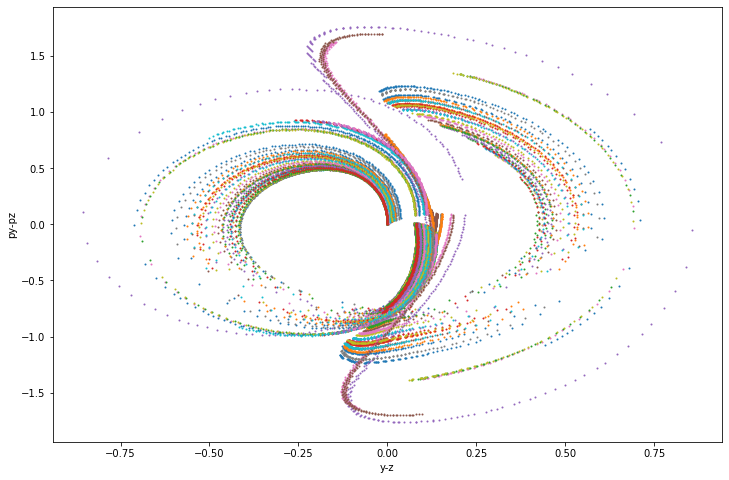

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1. -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,1,figsize = (12,8))

for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5,
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
    inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5, #setting some dimensions to 0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  # yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  # pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  # ax[0].scatter(yints, pyints, s=1.)
  # ax[0].set_xlabel("x-y")
  # ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax.scatter(yints, pyints, s=1.)
  ax.set_xlabel("y-z")
  ax.set_ylabel("py-pz")
  # yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  # pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  # ax[2].scatter(yints, pyints, s=1.)
  # ax[2].set_xlabel("z-x")
  # ax[2].set_ylabel("pz-px")
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

[0.08971182 0.5        0.5        1.07637251 0.5        0.5       ] 49 434


  2%|▏         | 1/50 [00:20<16:21, 20.02s/it]

[-0.30666536  0.5         0.5         0.3556164   0.5         0.5       ] 49 450


  4%|▍         | 2/50 [00:37<14:43, 18.40s/it]

[0.48908844 0.5        0.5        1.22464765 0.5        0.5       ] 49 445


  6%|▌         | 3/50 [00:54<13:58, 17.85s/it]

[0.17301013 0.5        0.5        1.13324448 0.5        0.5       ] 49 435


  8%|▊         | 4/50 [01:12<13:37, 17.77s/it]

[0.29982993 0.5        0.5        1.19146798 0.5        0.5       ] 49 443


 10%|█         | 5/50 [01:29<13:11, 17.60s/it]

[-0.26402961  0.5         0.5         0.52403104  0.5         0.5       ] 49 449


 12%|█▏        | 6/50 [01:47<12:54, 17.59s/it]

[0.45969564 0.5        0.5        1.22341762 0.5        0.5       ] 49 445


 14%|█▍        | 7/50 [02:04<12:32, 17.50s/it]

[0.09618445 0.5        0.5        1.08139263 0.5        0.5       ] 49 434


 16%|█▌        | 8/50 [02:22<12:17, 17.56s/it]

[0.42602651 0.5        0.5        1.22026671 0.5        0.5       ] 49 445


 18%|█▊        | 9/50 [02:39<11:55, 17.45s/it]

[0.17262714 0.5        0.5        1.13301934 0.5        0.5       ] 49 435


 20%|██        | 10/50 [02:56<11:39, 17.49s/it]

[-0.31126779  0.5         0.5         0.33149931  0.5         0.5       ] 49 450


 22%|██▏       | 11/50 [03:14<11:21, 17.48s/it]

[0.3996517 0.5       0.5       1.2164882 0.5       0.5      ] 49 445


 24%|██▍       | 12/50 [03:31<11:03, 17.45s/it]

[-0.07976646  0.5         0.5         0.89927692  0.5         0.5       ] 49 423


 26%|██▌       | 13/50 [03:48<10:43, 17.39s/it]

[-0.1898045   0.5         0.5         0.71414293  0.5         0.5       ] 49 405


 28%|██▊       | 14/50 [04:06<10:24, 17.34s/it]

[-0.20581912  0.5         0.5         0.67939805  0.5         0.5       ] 49 397


 30%|███       | 15/50 [04:23<10:06, 17.32s/it]

[-0.24473548  0.5         0.5         0.58181748  0.5         0.5       ] 49 448


 32%|███▏      | 16/50 [04:40<09:48, 17.32s/it]

[-0.32730331  0.5         0.5         0.22640905  0.5         0.5       ] 49 421


 34%|███▍      | 17/50 [04:57<09:30, 17.30s/it]

[-0.11166683  0.5         0.5         0.85329057  0.5         0.5       ] 49 419


 36%|███▌      | 18/50 [05:15<09:18, 17.45s/it]

[0.10122776 0.5        0.5        1.08523015 0.5        0.5       ] 49 434


 38%|███▊      | 19/50 [05:33<09:02, 17.50s/it]

[0.20340703 0.5        0.5        1.15011813 0.5        0.5       ] 49 439


 40%|████      | 20/50 [05:51<08:46, 17.55s/it]

[-0.29248727  0.5         0.5         0.42047343  0.5         0.5       ] 49 449


 42%|████▏     | 21/50 [06:08<08:26, 17.47s/it]

[0.12188239 0.5        0.5        1.10028678 0.5        0.5       ] 49 434


 44%|████▍     | 22/50 [06:25<08:07, 17.43s/it]

[-0.06815735  0.5         0.5         0.91478935  0.5         0.5       ] 49 425


 46%|████▌     | 23/50 [06:42<07:49, 17.38s/it]

[0.47932454 0.5        0.5        1.22439578 0.5        0.5       ] 49 445


 48%|████▊     | 24/50 [07:00<07:30, 17.34s/it]

[0.28903789 0.5        0.5        1.18771182 0.5        0.5       ] 49 443


 50%|█████     | 25/50 [07:17<07:12, 17.31s/it]

[0.12775572 0.5        0.5        1.10437923 0.5        0.5       ] 49 435


 52%|█████▏    | 26/50 [07:34<06:54, 17.29s/it]

[0.04695006 0.5        0.5        1.04039499 0.5        0.5       ] 49 430


 54%|█████▍    | 27/50 [07:52<06:38, 17.31s/it]

[0.0025094  0.5        0.5        0.99735274 0.5        0.5       ] 49 428


 56%|█████▌    | 28/50 [08:09<06:20, 17.30s/it]

[0.45596175 0.5        0.5        1.2231601  0.5        0.5       ] 49 445


 58%|█████▊    | 29/50 [08:26<06:02, 17.24s/it]

[0.10626191 0.5        0.5        1.08899686 0.5        0.5       ] 49 434


 60%|██████    | 30/50 [08:43<05:45, 17.28s/it]

[0.24393782 0.5        0.5        1.16967783 0.5        0.5       ] 49 439


 62%|██████▏   | 31/50 [09:01<05:30, 17.39s/it]

[-0.18630495  0.5         0.5         0.72139436  0.5         0.5       ] 49 406


 64%|██████▍   | 32/50 [09:18<05:11, 17.32s/it]

[0.09958135 0.5        0.5        1.08398445 0.5        0.5       ] 49 434


 66%|██████▌   | 33/50 [09:35<04:54, 17.32s/it]

[-0.32472448  0.5         0.5         0.24654452  0.5         0.5       ] 49 451


 68%|██████▊   | 34/50 [09:52<04:35, 17.25s/it]

[-0.28731759  0.5         0.5         0.44145722  0.5         0.5       ] 49 449


 70%|███████   | 35/50 [10:10<04:18, 17.25s/it]

[0.43012636 0.5        0.5        1.22075033 0.5        0.5       ] 49 445


 72%|███████▏  | 36/50 [10:27<04:01, 17.25s/it]

[0.41787662 0.5        0.5        1.21922267 0.5        0.5       ] 49 445


 74%|███████▍  | 37/50 [10:44<03:44, 17.25s/it]

[-0.04583473  0.5         0.5         0.94296708  0.5         0.5       ] 49 425


 76%|███████▌  | 38/50 [11:01<03:26, 17.25s/it]

[-0.15091266  0.5         0.5         0.78884801  0.5         0.5       ] 49 414


 78%|███████▊  | 39/50 [11:19<03:10, 17.33s/it]

[0.10018442 0.5        0.5        1.08444154 0.5        0.5       ] 49 434


 80%|████████  | 40/50 [11:36<02:53, 17.31s/it]

[0.43712302 0.5        0.5        1.22151151 0.5        0.5       ] 49 445


 82%|████████▏ | 41/50 [11:53<02:35, 17.30s/it]

[0.31672569 0.5        0.5        1.1969264  0.5        0.5       ] 49 443


 84%|████████▍ | 42/50 [12:11<02:18, 17.28s/it]

[0.21818653 0.5        0.5        1.15763048 0.5        0.5       ] 49 439


 86%|████████▌ | 43/50 [12:28<02:01, 17.42s/it]

[0.01234915 0.5        0.5        1.00741907 0.5        0.5       ] 49 428


 88%|████████▊ | 44/50 [12:46<01:44, 17.35s/it]

[0.38783431 0.5        0.5        1.2144181  0.5        0.5       ] 49 443


 90%|█████████ | 45/50 [13:03<01:26, 17.38s/it]

[-0.14407245  0.5         0.5         0.8007879   0.5         0.5       ] 49 416


 92%|█████████▏| 46/50 [13:20<01:09, 17.33s/it]

[-0.11834625  0.5         0.5         0.8429814   0.5         0.5       ] 49 419


 94%|█████████▍| 47/50 [13:38<00:51, 17.30s/it]

[0.14439714 0.5        0.5        1.11553435 0.5        0.5       ] 49 435


 96%|█████████▌| 48/50 [13:55<00:34, 17.31s/it]

[0.1090939  0.5        0.5        1.09108811 0.5        0.5       ] 49 434


 98%|█████████▊| 49/50 [14:12<00:17, 17.30s/it]

[0.14429863 0.5        0.5        1.1154702  0.5        0.5       ] 49 435


100%|██████████| 50/50 [14:29<00:00, 17.40s/it]


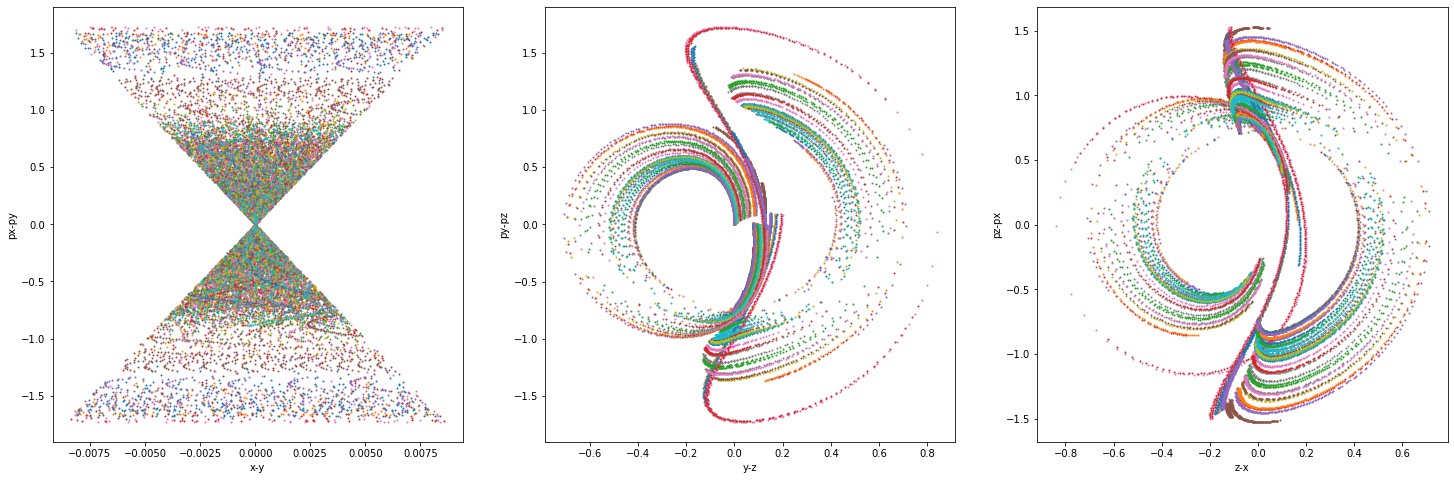

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1. -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 0)&(data[ii+1] < 0):
            prb.append(ii)
        if (data[ii] < 0)& (data[ii+1] > 0):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,3,figsize = (25,8))

for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5,
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
    inp[1], inp[2], inp[4], inp[5] = 0.5,0.5,0.5,0.5, #setting some dimensions to 0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=80000,n_h=1)
  xcrossings = findcrossings(np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])
  print(inp, i, len(xcrossings))
  yints = [.5*((np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross] + (np.asarray(soln[0])[0,:]-np.asarray(soln[0])[1,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross] + (np.asarray(soln[0])[3,:]-np.asarray(soln[0])[4,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[0].scatter(yints, pyints, s=1.)
  ax[0].set_xlabel("x-y")
  ax[0].set_ylabel("px-py")
  yints = [.5*((np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross] + (np.asarray(soln[0])[1,:]-np.asarray(soln[0])[2,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross] + (np.asarray(soln[0])[4,:]-np.asarray(soln[0])[5,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[1].scatter(yints, pyints, s=1.)
  ax[1].set_xlabel("y-z")
  ax[1].set_ylabel("py-pz")
  yints = [.5*((np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross] + (np.asarray(soln[0])[2,:]-np.asarray(soln[0])[0,:])[cross+1]) for cross in xcrossings] # average y for each crossing
  pyints = [.5*((np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross] + (np.asarray(soln[0])[5,:]-np.asarray(soln[0])[3,:])[cross+1]) for cross in xcrossings] #average ydot for each crossing
  ax[2].scatter(yints, pyints, s=1.)
  ax[2].set_xlabel("z-x")
  ax[2].set_ylabel("pz-px")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

f1 = lambda x: np.asarray([x[3], x[4], x[5]])
f2 = lambda x: np.asarray([-np.exp(x[0]-x[1])+np.exp(x[2]-x[0]),
                           -np.exp(x[1]-x[2])+np.exp(x[0]-x[1]),
                           -np.exp(x[2]-x[0])+np.exp(x[1]-x[2]),])
H = lambda x: 0.5*(x[3]**2+x[4]**2+x[5]**2)+np.exp(x[0]-x[1])+np.exp(x[1]-x[2])+np.exp(x[2]-x[0])-3
px = lambda x: 2*(1.035446 -  0.5*(x[4]**2+x[5]**2)-np.exp(x[0]-x[1])-np.exp(x[1]-x[2])-np.exp(x[2]-x[0])+3)

def findcrossings(data):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in range(len(data)-1):
        if (data[ii] > 1)&(data[ii+1] < 1):
            prb.append(ii)
        if (data[ii] < 1)& (data[ii+1] > 1):
            prb.append(ii)
    return np.array(prb)

fig, ax = plt.subplots(1,9,figsize = (25,8))
for inp in tqdm(range(50)): # number of trajectories
  inp = np.random.rand(6)*1.-0.5
  while px(inp)<0:
    inp = np.random.rand(6)*1.-0.5
  inp[3] = np.sqrt(px(inp))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000000,n_h=1)
  for i in range(3):
    xcrossings = findcrossings(np.asarray(soln[0])[i,:])
    print(inp, i, len(xcrossings))
    yints = [.5*(np.asarray(soln[0])[0, cross] + np.asarray(soln[0])[0, cross+1]) for cross in xcrossings] # average y for each crossing
    pyints = [.5*(np.asarray(soln[0])[3, cross] + np.asarray(soln[0])[3, cross+1]) for cross in xcrossings] #average ydot for each crossing
    ax[i*3+0].scatter(yints, pyints)
    ax[i*3+0].set_xlabel("x")
    ax[i*3+0].set_ylabel("px")
    yints = [.5*(np.asarray(soln[0])[1, cross] + np.asarray(soln[0])[1, cross+1]) for cross in xcrossings] # average y for each crossing
    pyints = [.5*(np.asarray(soln[0])[4, cross] + np.asarray(soln[0])[4, cross+1]) for cross in xcrossings] #average ydot for each crossing
    ax[i*3+1].scatter(yints, pyints)
    ax[i*3+1].set_xlabel("y")
    ax[i*3+1].set_ylabel("py")
    yints = [.5*(np.asarray(soln[0])[2, cross] + np.asarray(soln[0])[2, cross+1]) for cross in xcrossings] # average y for each crossing
    pyints = [.5*(np.asarray(soln[0])[5, cross] + np.asarray(soln[0])[5, cross+1]) for cross in xcrossings] #average ydot for each crossing
    ax[i*3+2].scatter(yints, pyints)
    ax[i*3+2].set_xlabel("z")
    ax[i*3+2].set_ylabel("pz")
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

[-0.46195532  0.4565441   0.16716882  0.87023011  0.03149428  0.30206852] 0 3
[-0.46195532  0.4565441   0.16716882  0.87023011  0.03149428  0.30206852] 1 1


  2%|▏         | 1/50 [35:51<29:16:54, 2151.33s/it]

[-0.46195532  0.4565441   0.16716882  0.87023011  0.03149428  0.30206852] 2 1
[-0.12558602 -0.14618097 -0.12173218  1.37470347 -0.14054685  0.40036745] 0 1
[-0.12558602 -0.14618097 -0.12173218  1.37470347 -0.14054685  0.40036745] 1 1


  4%|▍         | 2/50 [1:11:36<28:38:06, 2147.63s/it]

[-0.12558602 -0.14618097 -0.12173218  1.37470347 -0.14054685  0.40036745] 2 1
[-0.05320668  0.33699037 -0.27817597  1.09886394  0.42961874  0.16721471] 0 1
[-0.05320668  0.33699037 -0.27817597  1.09886394  0.42961874  0.16721471] 1 1


  6%|▌         | 3/50 [1:47:24<28:02:36, 2148.02s/it]

[-0.05320668  0.33699037 -0.27817597  1.09886394  0.42961874  0.16721471] 2 1
[ 0.29807902  0.05099397  0.48046646  1.22909654 -0.45448929 -0.3020172 ] 0 3
[ 0.29807902  0.05099397  0.48046646  1.22909654 -0.45448929 -0.3020172 ] 1 3


  8%|▊         | 4/50 [2:23:30<27:32:16, 2155.14s/it]

[ 0.29807902  0.05099397  0.48046646  1.22909654 -0.45448929 -0.3020172 ] 2 3
[-0.09522637  0.10127717  0.27193087  1.31379966  0.21005831  0.2898695 ] 0 1
[-0.09522637  0.10127717  0.27193087  1.31379966  0.21005831  0.2898695 ] 1 1


 10%|█         | 5/50 [3:00:01<27:05:49, 2167.76s/it]

[-0.09522637  0.10127717  0.27193087  1.31379966  0.21005831  0.2898695 ] 2 1
[-0.1827398   0.47927024  0.1496565   1.18671455  0.05593769  0.24160311] 0 1
[-0.1827398   0.47927024  0.1496565   1.18671455  0.05593769  0.24160311] 1 1


 12%|█▏        | 6/50 [3:35:47<26:24:26, 2160.60s/it]

[-0.1827398   0.47927024  0.1496565   1.18671455  0.05593769  0.24160311] 2 1
